In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import random
import os
from lifelines import KaplanMeierFitter

In [2]:
data_path = '../data/'

# Two Class Survival Analysis

In [3]:
pub_two_class = 'JeeEtAl/'

path_noSmoking = data_path+pub_two_class+'noSmoking.tsv'
df_noSmoking = pd.read_csv(path_noSmoking, sep='\t')
path_smoking = data_path+pub_two_class+'smoking.tsv'
df_smoking = pd.read_csv(path_smoking, sep = '\t')

In [4]:
df_smoking['Class'] = 'Smoking'
df_noSmoking['Class'] = 'noSmoking'
df_two_class_survival = pd.concat([df_smoking, df_noSmoking])

In [5]:
# map censored values to 0 and decesead values to 1
df_two_class_survival['Status'] = df_two_class_survival['Status'].map({'censored': 0, 'deceased': 1})

df_two_class_survival

,Case ID,Study ID,Number at Risk,Status,Survival Rate,Time (months),Class
0,MSK-L-817,nsclc_ctdx_msk_2022,584,0,1.000000,0.032852,Smoking
1,P-0027853,nsclc_ctdx_msk_2022,583,0,1.000000,0.065703,Smoking
2,MSK-L-679,nsclc_ctdx_msk_2022,582,0,1.000000,0.065703,Smoking
3,P-0051398,nsclc_ctdx_msk_2022,581,0,1.000000,0.131406,Smoking
4,MSK-L-309,nsclc_ctdx_msk_2022,580,1,0.998276,0.262812,Smoking
...,...,...,...,...,...,...,...
513,NCI-L-150,nsclc_ctdx_msk_2022,5,1,0.082186,118.232589,noSmoking
514,P-0022101,nsclc_ctdx_msk_2022,4,0,0.082186,128.777924,noSmoking
515,NCI-L-199,nsclc_ctdx_msk_2022,3,1,0.054790,145.827858,noSmoking
516,P-0046477,nsclc_ctdx_msk_2022,2,0,0.054790,170.433640,noSmoking


In [6]:
kmf = KaplanMeierFitter()

Text(0, 0.5, 'Probability of Survival')

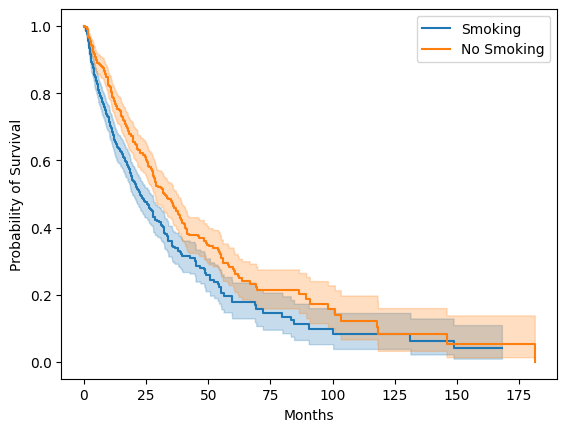

In [7]:
ax = plt.subplot(111)

T = df_two_class_survival['Time (months)']
E = df_two_class_survival['Status']

smok = (df_two_class_survival['Class'] == 'Smoking')

kmf.fit(T[smok], event_observed=E[smok], label="Smoking")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~smok], event_observed=E[~smok], label="No Smoking")
kmf.plot_survival_function(ax=ax)

plt.xlabel('Months')
plt.ylabel('Probability of Survival')

In [8]:
from lifelines.statistics import logrank_test

results = logrank_test(T[smok], T[~smok], E[smok], E[~smok])

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          14.96 <0.005     13.16

In [9]:
from lifelines.statistics import logrank_test
from lifelines.datasets import load_waltons

ix = df_two_class_survival['Class'] == 'Smoking'
T_exp, E_exp = df_two_class_survival.loc[ix, 'Time (months)'], df_two_class_survival.loc[ix, 'Status']
T_con, E_con = df_two_class_survival.loc[~ix, 'Time (months)'], df_two_class_survival.loc[~ix, 'Status']



results = logrank_test(T_exp, T_con, event_observed_A=E_exp, event_observed_B=E_con)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          14.96 <0.005     13.16

# Multi Class Survival Analysis: Predefined Risks Categories

In [10]:
pub_mult_group = 'BernardEtAl/'

path_verylow = data_path+pub_mult_group+'veryLow.tsv'
df_verylow = pd.read_csv(path_verylow, sep='\t')
path_low = data_path+pub_mult_group+'low.tsv'
df_low = pd.read_csv(path_low, sep='\t')
path_int = data_path+pub_mult_group+'int.tsv'
df_int = pd.read_csv(path_int, sep='\t')
path_high = data_path+pub_mult_group+'high.tsv'
df_high = pd.read_csv(path_high, sep='\t')
path_veryhigh = data_path+pub_mult_group+'veryHigh.tsv'
df_veryhigh = pd.read_csv(path_veryhigh, sep='\t')

In [11]:
# Add a column with the risk group to each of the dataframes
df_verylow['Risk Group'] = 'Very Low'
df_low['Risk Group'] = 'Low'
df_int['Risk Group'] = 'Intermediate'
df_high['Risk Group'] = 'High'
df_veryhigh['Risk Group'] = 'Very High'

# Concatenate the dataframes
df_multiclass_survival = pd.concat([df_verylow, df_low, df_int, df_high, df_veryhigh])

In [12]:
# map censored values to 0 and decesead values to 1
df_multiclass_survival['Status'] = df_multiclass_survival['Status'].map({'censored': 0, 'deceased': 1})

df_multiclass_survival

,Case ID,Study ID,Number at Risk,Status,Survival Rate,Time (months),Risk Group
0,E-H-117419,mds_iwg_2022,482,0,1.000000,0.000000,Very Low
1,E-H-105850,mds_iwg_2022,481,0,1.000000,0.000000,Very Low
2,E-H-105880,mds_iwg_2022,480,0,1.000000,0.000000,Very Low
3,E-H-110409,mds_iwg_2022,479,0,1.000000,0.000000,Very Low
4,E-H-110822,mds_iwg_2022,478,0,1.000000,0.000000,Very Low
...,...,...,...,...,...,...,...
355,E-H-105678,mds_iwg_2022,5,0,0.058110,77.786301,Very High
356,E-H-116517,mds_iwg_2022,4,1,0.043582,79.923288,Very High
357,E-H-105691,mds_iwg_2022,3,0,0.043582,97.380822,Very High
358,E-H-105650,mds_iwg_2022,2,0,0.043582,129.665753,Very High


In [13]:
kmf = KaplanMeierFitter()

In [14]:
T = df_multiclass_survival['Time (months)']
E = df_multiclass_survival['Status']

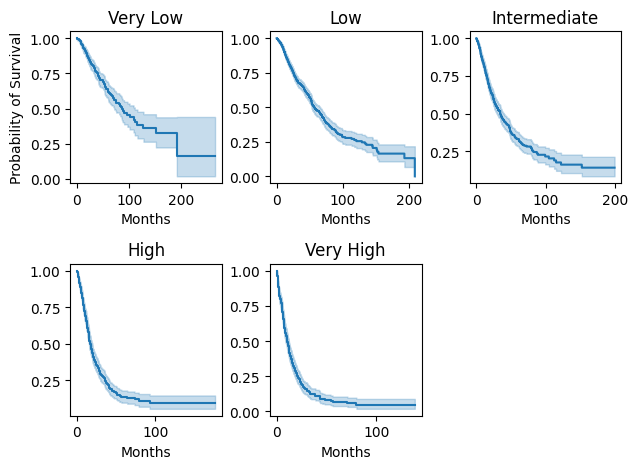

In [15]:
risks_types = df_multiclass_survival['Risk Group'].unique()

for i, risk_type in enumerate(risks_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = df_multiclass_survival['Risk Group'] == risk_type
    kmf.fit(T[ix], E[ix], label=risk_type)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(risk_type)
    plt.xlabel('Months')
    if i==0:
        plt.ylabel('Probability of Survival')

plt.tight_layout()

# $\varepsilon$-DP Obfuscation Method